## 线性代数实验

### 代码实现介绍

numpy 是一款基于 Python 的数值处理模块，在处理矩阵数据方面有很强大的功能与优势。因为线性代数的主要内容就是对矩阵的处理，所以本章节主要的内容都是基于 numpy 进行展开。另外也会涉及到方程组求解，所以也会用到数学科学库 scipy。

### 实现

#### 1. 导入相应的库

In [1]:
import numpy as np
import scipy as sp

#### 2. reshape 运算

reshape 用来改变一个张量的维度数和每个维度的大小

In [2]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

(12,)

In [4]:
x = x.reshape(1, 12)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [5]:
x.shape

(1, 12)

In [6]:
x = x.reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
x.shape

(3, 4)

#### 3. 转置实现

向量和矩阵的转置是交换行列顺序，而三维及以上张量的转置就需要指定转换的维度。

In [8]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
A.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

#### 4. 矩阵乘法实现

**两个矩阵能够相乘的条件为第一个矩阵的列数等于第二个矩阵的行数。**

In [10]:
A = np.arange(6).reshape(3, 2)
B = np.arange(6).reshape(2, 3)

In [11]:
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [12]:
B

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
np.matmul(A, B)

array([[ 3,  4,  5],
       [ 9, 14, 19],
       [15, 24, 33]])

#### 5. 矩阵对应运算

元素对应运算：针对形状相同矩阵的运算统称，包括元素对应相乘、相加等，即对两个矩阵**相同位置的元素进行加减乘除等运算**。

In [14]:
A = np.arange(6).reshape(3, 2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [15]:
A * A

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

In [16]:
A + A

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### 6. 逆矩阵的实现

只有方阵才有逆矩阵，逆矩阵实现。

In [17]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [18]:
np.linalg.inv(A)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

#### 7. 特征值与特征向量

求矩阵的特征值与特征向量并实现可视化。

##### 7.1 导入相应的库

In [20]:
from scipy.linalg import eig
import matplotlib.pyplot as plt

##### 7.2 求特征值与特征向量

In [21]:
A = [[1, 2], [2, 1]]  # 生成一个 2*2 矩阵
evals, evecs = eig(A)  # 求 A 的特征值（evals）与特征向量（evecs）
evals

array([ 3.+0.j, -1.+0.j])

In [24]:
evecs = evecs[:, 0], evecs[:, 1]
evecs

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))

##### 7.3 绘图

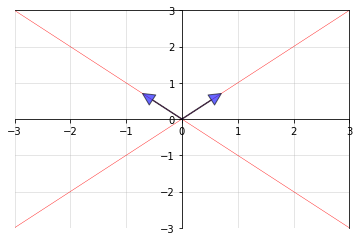

In [29]:
fig, ax = plt.subplots()  # fig 代表整个图像，ax 代表坐标轴和画的图
# 让坐标轴经过原点
for spine in ['left', 'bottom']:  # 让在左下角坐标轴经过原点
    ax.spines[spine].set_position('zero')
ax.grid(alpha=0.4)  # 画出网格
# 设置坐标轴范围
xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
# 画出特征向量
for v in evecs:
    ax.annotate(
        "", xy=v, xytext=(0, 0),
        arrowprops=dict(
            facecolor='blue',
            shrink=0,
            alpha=0.6,
            width=0.5
        )
    )
# 画出特征空间
x = np.linspace(xmin, xmax, 3)  # 在指定的范围内返回间隔均匀的数字
for v in evecs:
    a = v[1] / v[0]  # 沿特征向量方向上的单位向量
    ax.plot(x, a * x, 'r-', lw=0.4)  # lw 表示图线的粗细
plt.show()

#### 8. 求行列式

求一个矩阵的行列式。

In [30]:
A

[[1, 2], [2, 1]]

In [32]:
np.linalg.det(A)

-2.9999999999999996

#### 9. 奇异值分解实现

例子：
    假如我们是一个新闻资讯提供方，每天会有大量不同领域的文章需要推送给用户，但是这些文章质量参差不齐，为了更好的用户体验，我们需要对海量的文章进行归类然后选取质量比较好的推送给用户。那么问题来了，对于海量文章，用什么方式可以自动将文章归类呢？这里介绍一种比较简单的思想如下：通常情况下文章的标题是由少量核心概念词构成，这些核心词代表了文章的主旨，因此我们可以间接通过文章标题的相似度来判断两篇文章是否是一类。文章标题的相似度的判断是以词之间的相似度作为基础的，那么如何判断标题中词和词之间的相似度呢？ 下面我们使用奇异值分解来解决这个问题。假设有 8 个标题，每个标题包含的关键词如下：

title_1 = ["dad","dad","stock"]

title_2 = ["books","books","value","estate"]

title_3 = ["books","decomposition"]

title_4 = ["stock"]

title_5 = ["dad"]

title_6 = ["value","singular","decomposition"]

title_7 = ["dad","singular"]

title_8 = ["singular","estate","decomposition"]

##### 9.1 输入关键字

In [33]:
words = ["books","dad","stock","value","singular","estate","decomposition"]

In [34]:
# 已知 8 个标题， 7 个关键字。记录每个标题中每个关键字出现的次数，得矩阵 X
X=np.array([[0,2,1,0,0,0,0],[2,0,0,1,0,1,0],[1,0,0,0,0,0,1],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,1,1,0,1],[0,1,0,0,1,0,0],[0,0,0,0,1,1,1]])

##### 9.2 进行奇异值分解

In [35]:
U, s, Vh = np.linalg.svd(X)

In [36]:
U

array([[-1.87135757e-01, -7.93624528e-01,  2.45011855e-01,
        -2.05404352e-01, -3.19189120e-16, -5.57732834e-15,
        -2.57394431e-01, -4.08248290e-01],
       [-6.92896814e-01,  2.88368077e-01,  5.67788037e-01,
         2.22142537e-01,  2.54000254e-01,  5.86234773e-15,
        -2.21623012e-02, -5.55111512e-17],
       [-3.53233681e-01,  1.22606651e-01,  3.49203461e-02,
        -4.51735990e-01, -7.62000762e-01, -1.17246955e-14,
         2.72513448e-01,  8.32667268e-17],
       [-2.61369658e-02, -1.33189110e-01,  7.51079037e-02,
        -6.44727454e-01,  5.08000508e-01, -1.74851395e-14,
         3.68146235e-01,  4.08248290e-01],
       [-8.04993957e-02, -3.30217709e-01,  8.49519758e-02,
         2.19661551e-01, -2.54000254e-01,  6.03562003e-15,
        -3.12770333e-01,  8.16496581e-01],
       [-3.95029694e-01,  1.56123876e-02, -5.28290830e-01,
        -6.82340484e-02,  1.27000127e-01, -7.07106781e-01,
        -2.09360158e-01, -8.32667268e-17],
       [-2.02089013e-01, -3.803958

In [37]:
U.shape

(8, 8)

In [38]:
s

array([2.85653844, 2.63792139, 2.06449303, 1.14829917, 1.        ,
       1.        , 0.54848559])

In [39]:
s.shape

(7,)

In [40]:
Vh

array([[-6.08788345e-01, -2.29949618e-01, -7.46612474e-02,
        -3.80854846e-01, -3.47325416e-01, -3.80854846e-01,
        -4.00237243e-01],
       [ 2.65111314e-01, -8.71088358e-01, -3.51342402e-01,
         1.15234846e-01, -1.32365989e-01,  1.15234846e-01,
         5.83153945e-02],
       [ 5.66965547e-01,  1.75382762e-01,  1.55059743e-01,
         1.91316736e-02, -6.14911671e-01,  1.91316736e-02,
        -4.94872736e-01],
       [-6.48865369e-03,  2.52237176e-01, -7.40339999e-01,
         1.34031699e-01,  2.99854608e-01,  1.34031699e-01,
        -5.12239408e-01],
       [-2.54000254e-01, -2.54000254e-01,  5.08000508e-01,
         3.81000381e-01,  2.54000254e-01,  3.81000381e-01,
        -5.08000508e-01],
       [ 0.00000000e+00,  7.90632607e-15, -2.28822292e-14,
        -7.07106781e-01,  8.96165835e-15,  7.07106781e-01,
        -1.53872902e-14],
       [ 4.16034348e-01, -1.71550021e-01,  2.01922906e-01,
        -4.22112199e-01,  5.73845817e-01, -4.22112199e-01,
        -2.6656464

In [41]:
Vh.shape

(7, 7)

##### 9.3 绘图

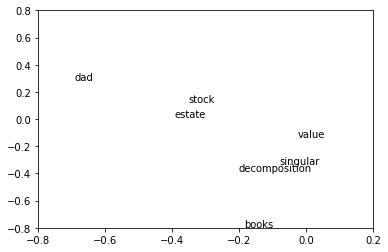

In [45]:
plt.axis([-0.8, 0.2, -0.8, 0.8])
for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])  # 原来每个关键字由 1*8 的向量表示，现在降维成 1*2 的向量便于可视化
plt.show()

通过降维后，我们可以将关键词聚类，如stock、estate可以化为一组，value、singular、decompostion可以化为一组。

#### 10. 奇异值分解——图像压缩

##### 10.1 导入库

In [46]:
from pylab import *

##### 10.2 读取图像并保存灰度图现实

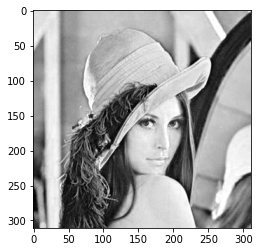

In [48]:
img = imread("./img/lena.jpg")[:, :, 0]
plt.savefig("./img/lena_gray")
plt.gray()
plt.figure(1)
plt.imshow(img)

##### 10.3 读取图像长宽

In [49]:
m, n = img.shape
np.shape(img)

(311, 311)

#### 对图像矩阵进行奇异值分解

In [50]:
U, Sigma, V = np.linalg.svd(img)
Sigma.shape

(311,)

##### 10.4 将奇异值整理成一个对角矩阵

In [51]:
Sigma = resize(Sigma, [m, 1])*eye(m, n)

##### 10.5 取前k个奇异值构造新图像

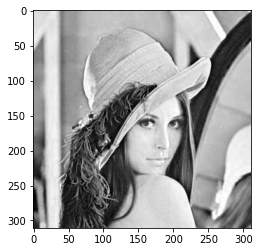

In [52]:
k = 200
img1 = np.dot(U[:, 0:k], np.dot(Sigma[0:k, 0:k], V[0:k, :]))
plt.figure(2)
plt.imshow(img1)
plt.show()  #  现实压缩后的图片

#### 11. 线性方程组求解

求解线性方程组比较简单，只需要用到一个函数(scipy.linalg.solve)就可以了。

    有三种价格未知的水果，苹果、香蕉、葡萄；已知，李雷购买 10 斤苹果、 2 斤香蕉、 5 斤葡萄花费了 10 元，韩梅梅购买 4 斤苹果、 4 斤香蕉、 2 斤葡萄花费了 8 元，汤姆购买 2 斤苹果、 2 斤香蕉、 2 斤葡萄花费了 5 元；问，苹果、香蕉、葡萄分别多少钱一斤？
    根据已知条件，可以构建如下多元方程组，其中 x_1、 x_2、 x_3 分别是苹果、香蕉、葡萄的价格，目的是求解 x_1、 x_2、 x_3 的值：

10x_1 + 2x_2 + 5x_3 = 10

4x_1 + 4x_2 + 2x_3 = 8

2x_1 + 2x_2 + 2x_3 = 5

##### 11.1 导入包

In [53]:
from scipy.linalg import solve

##### 11.2 求解

In [54]:
a = np.array([[10, 2, 5], [4, 4, 2], [2, 2, 2]])
b = np.array([10, 8, 5])
x = solve(a, b)
x

array([0.25, 1.25, 1.  ])